In [1]:
# Define the dataset
data = {
    'Outlook': ['Sunny', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Sunny', 'Overcast'],
    'Play': ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
}

# Calculate the total number of instances
total_instances = len(data['Outlook'])

# Calculate the number of instances where the outlook is sunny
sunny_instances = sum(1 for outlook in data['Outlook'] if outlook == 'Sunny')

# Calculate the number of instances where the outlook is sunny and the player plays
sunny_play_instances = sum(1 for i in range(total_instances) if data['Outlook'][i] == 'Sunny' and data['Play'][i] == 'Yes')

# Calculate the probability of playing the game given that the outlook is sunny
probability_play_on_sunny_day = sunny_play_instances / sunny_instances

print("Probability of playing the game on a Sunny day:", probability_play_on_sunny_day)


Probability of playing the game on a Sunny day: 0.75


In [4]:
import pandas as pd
# Create a DataFrame
df = pd.DataFrame(data)
df

,Outlook,Play
0,Sunny,No
1,Rainy,Yes
2,Overcast,Yes
3,Sunny,Yes
4,Sunny,Yes
5,Overcast,Yes
6,Rainy,No
7,Sunny,Yes
8,Overcast,Yes


In [5]:
import pandas as pd
import random

# Define the possible values for Outlook and Play
outlook_values = ['Sunny', 'Rainy', 'Overcast']
play_values = ['Yes', 'No']

# Generate 20 random data points
data = {
    'Outlook': [random.choice(outlook_values) for _ in range(20)],
    'Play': [random.choice(play_values) for _ in range(20)]
}
df = pd.DataFrame(data)
df

,Outlook,Play
0,Overcast,No
1,Sunny,Yes
2,Rainy,Yes
3,Rainy,No
4,Overcast,No
5,Rainy,No
6,Sunny,No
7,Sunny,No
8,Sunny,No
9,Rainy,No


In [6]:
# Calculate the total number of instances
total_instances = len(df)

# Calculate the number of instances where the outlook is sunny
sunny_instances = len(df[df['Outlook'] == 'Sunny'])

# Calculate the number of instances where the outlook is sunny and the player plays
sunny_play_instances = len(df[(df['Outlook'] == 'Sunny') & (df['Play'] == 'Yes')])

# Calculate the prior probability of playing the game
prior_probability_play = df['Play'].value_counts(normalize=True)['Yes']

# Calculate the probability of playing the game given that the outlook is sunny using Bayes' theorem
probability_play_given_sunny = (sunny_play_instances / sunny_instances) * prior_probability_play

print("Probability of playing the game on a Sunny day using Bayes' theorem:", probability_play_given_sunny)

Probability of playing the game on a Sunny day using Bayes' theorem: 0.09999999999999999


In [10]:
# Group the data by Outlook and Play, and count the occurrences of 'Yes' and 'No'
outlook_play_counts = df.groupby(['Outlook', 'Play']).size().unstack(fill_value=0)

# Add a Total column to sum the counts of 'Yes' and 'No' for each Outlook
outlook_play_counts['Total'] = outlook_play_counts.sum(axis=1)

print("Number of 'Yes' and 'No' instances for each Weather Outlook:\n \n")
print(outlook_play_counts)

Number of 'Yes' and 'No' instances for each Weather Outlook:
 

Play      No  Yes  Total
Outlook                 
Overcast   1    5      6
Rainy      5    3      8
Sunny      5    1      6


In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(X_test)

In [14]:
# Calculate the accuracy of the classifier
accuracy = gnb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [15]:

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [16]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


# Example-1

In [1]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt 

df_user =  pd.read_csv('User_Data.csv')

# Display the DataFrame
print(df_user.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [2]:
df_user

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# Importing the dataset  
X = df_user.iloc[:, [2, 3]].values  
y = df_user.iloc[:, 4].values  

# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [8]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [9]:
# Predicting the Test set results  
y_pred = classifier.predict(X_test)  

In [10]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

[[65  3]
 [ 7 25]]


In [11]:
# Visualising the Training set results  
x_set, y_set = X_train, y_train  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

C:\Users\hp\AppData\Local\Temp\ipykernel_16532\520982555.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


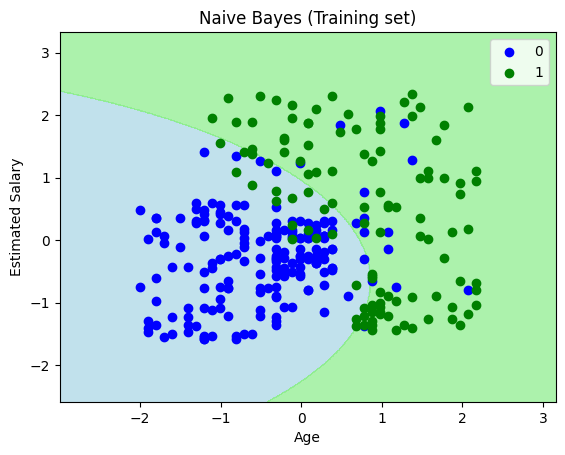

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
            alpha=0.75, cmap=ListedColormap(['lightblue', 'lightgreen']))
plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c=ListedColormap(['blue', 'green'])(i), label=j)  
plt.title('Naive Bayes (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  


C:\Users\hp\AppData\Local\Temp\ipykernel_16532\67012725.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


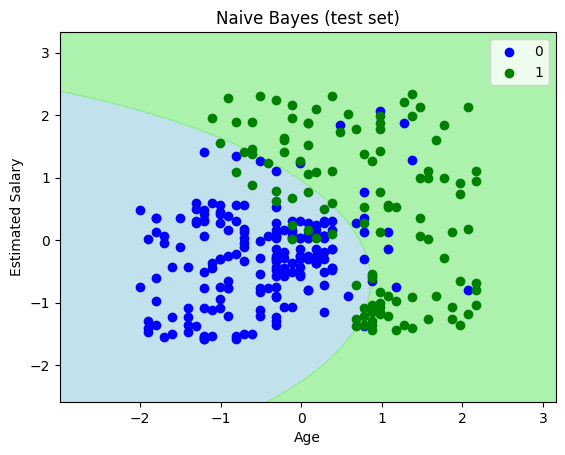

In [13]:
from matplotlib.colors import ListedColormap

# Define color values for the colormap
color_map = ListedColormap(['lightblue', 'lightgreen'])

# Visualize the test set results
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=color_map)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(['blue', 'green'])(i), label=j)

plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
